# JUDUL: ANALISIS KOMPREHENSIF TERHADAP FILM-FILM DI IMDB

## TOPIC :
Distribusi genre & revenue film pada IMDB.<br>
Bagaimana meningkatkan pendapatan film <br>
Memprediksi kesuksesan sebuah film

## PROBLEM :
Bagaimana distribusi genre dan revenue dalam IMDb Top?<br>
Bagaimana meningkatkan pendapatan film pendapatan film?<br>
Apakah mampu memprediksi kesuksesan sebuah film?


## OVERVIEW :
Dataset IMDB Movies merupakan kumpulan data terkait film-film yang tercatat dalam website IMDB, yang dikenal luas sebagai sumber referensi utama dalam industri film. Dataset ini mencakup informasi seperti judul film, tahun release, genre, skor, artist, serta berbagai metadata lainnya. Melalui analisis terhadap dataset ini, diharapkan dapat diperoleh pemahaman yang lebih mendalam mengenai karakteristik dari film-film yang mendapat apresiasi tinggi dari audiens. Ini memberikan kesempatan bagi peneliti untuk menggali tren serta pola yang berlaku di dalam industri film secara lebih ekstensif.

## OUTPUT YANG DIHARAPKAN :
Mampu memberikan rekomendasi dalam meningkatkan revenue secara akurat

## DATA PREPROCESSING

### IMPORT DATASET

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load datasets
df = pd.read_csv('/content/drive/MyDrive/dibimbing/Finpro_Ahfi Fahrul Farisy/imdb_movies.csv')
df.head(10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
5,Cocaine Bear,02/23/2023,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU
6,John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU
7,Puss in Boots: The Last Wish,12/26/2022,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU
8,Attack on Titan,09/30/2022,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,2.549465e+08,US
9,The Park,03/02/2023,58.0,"Action, Drama, Horror, Science Fiction, Thriller",A dystopian coming-of-age movie focused on thr...,"Chloe Guidry, Ines, Nhedrick Jabier, Bui, Carm...",The Park,Released,English,119200000.0,4.889625e+08,US


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


Ada beberapa missing value. <br>
Ada tipe data yang tidak sesuai, yaitu : `date_x`

### HANDLING MISSING VALUE DAN MEMPERBAIKI DATASET YANG SALAH

In [ ]:
df.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


In [ ]:
#mencari tahu berapa persen missing value
total_missing = df.isna().any(axis=1).sum()
persentase_missing = round((total_missing / df.shape[0]) * 100, 2)
print(f"Missing Percentage secara keseluruhan ada {persentase_missing}%")

Missing Percentage secara keseluruhan ada 1.24%


In [ ]:
#drop missing value
df = df.dropna()

In [ ]:
# Mengonversi kolom date_x menjadi datetime
df['date_x'] = pd.to_datetime(df['date_x'], dayfirst=True)

# Mengambil data bulan
df['released_month'] =  df['date_x'].dt.month

# mengganti nama kolom, dan mengambil data tahun saja
df.rename(columns={'date_x': 'released_year'}, inplace=True)
df['released_year'] = df['released_year'].dt.year

# menyesuaikan nama kolom agar lebih rapih
df.rename(columns={'budget_x': 'budget'}, inplace=True)

### CHECKING DUPCLIATES

In [ ]:
#mengecek apakah terdapat duplikat
df.duplicated().sum()

0

In [ ]:
df.describe()

,released_year,score,budget,revenue,released_month
count,10052.000000,10052.00000,1.005200e+04,1.005200e+04,10052.000000
mean,2007.924294,63.82700,6.412528e+07,2.512049e+08,6.546956
std,15.287825,12.78271,5.665852e+07,2.765495e+08,3.548025
min,1903.000000,0.00000,1.000000e+00,0.000000e+00,1.000000
25%,2002.000000,59.00000,1.439763e+07,2.768781e+07,3.000000
50%,2013.000000,65.00000,5.000000e+07,1.493288e+08,7.000000
75%,2019.000000,71.00000,1.040000e+08,4.161578e+08,10.000000
max,2023.000000,100.00000,4.600000e+08,2.923706e+09,12.000000


ada beberapa value yang menurut saya tidak mungkin yaitu budget dibawah USD 1000, revenue dibawah USD 1000, dan score dibawah 20. saya memutuskan untuk drop data tersebut

In [ ]:
# drop data yang bermasalah
df = df.loc[(df['score'] >= 20) & (df['budget'] >= 1000) & (df['revenue'] >= 1000)]

In [ ]:
df['country'].value_counts()

AU    4826
US    2622
JP     492
KR     304
FR     214
GB     167
ES     147
IT     121
HK     115
MX     102
CN      84
DE      83
CA      65
RU      46
AR      39
PH      34
BR      34
TH      27
IN      26
DK      24
PL      21
NO      16
TR      15
CO      14
NL      14
TW      12
IE      10
CL       9
ID       8
SE       8
PE       7
BE       6
FI       6
GR       5
SU       5
UA       4
SG       3
ZA       3
CH       3
GT       2
MY       2
PR       2
IS       2
CZ       2
VN       1
DO       1
IL       1
HU       1
BO       1
PY       1
MU       1
XC       1
UY       1
AT       1
Name: country, dtype: int64

terlalu banyak film dari australia, akan kita coba teliti lebih lanjut

In [ ]:
# Filter DataFrame untuk hanya film dengan country 'AU'
au_data = df.loc[df['country'] == 'AU']
au_data.sample(20)

,names,released_year,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,released_month
5712,The Bridge on the River Kwai,1957,78.0,"Drama, History, War",The classic story of English POWs in Burma for...,"William Holden, Cmdr. Shears, Alec Guinness, C...",The Bridge on the River Kwai,Released,English,3000000.0,33300000.0,AU,2
3176,Star Trek: Nemesis,2003,63.0,"Science Fiction, Action, Adventure, Thriller",En route to the honeymoon of William Riker to ...,"Patrick Stewart, Captain Jean-Luc Picard, Jona...",Star Trek: Nemesis,Released,English,60000000.0,67312826.0,AU,6
6600,Paycheck,2004,62.0,"Action, Adventure, Mystery, Science Fiction, T...",Michael Jennings is a genius who's hired – and...,"Ben Affleck, Michael Jennings, Uma Thurman, Ra...",Paycheck,Released,English,60000000.0,98819789.0,AU,3
5370,"sex, lies, and videotape",1989,69.0,Drama,A sexually repressed woman's husband is having...,"Andie MacDowell, Ann Bishop Mullany, Peter Gal...","sex, lies, and videotape",Released,English,1200000.0,24741667.0,AU,11
324,Resident Evil: Welcome to Raccoon City,2021,61.0,"Horror, Science Fiction, Action",Once the booming home of pharmaceutical giant ...,"Kaya Scodelario, Claire Redfield, Hannah John-...",Resident Evil: Welcome to Raccoon City,Released,English,25000000.0,41909091.0,AU,9
2753,The Greatest Showman,2017,79.0,Drama,"The story of American showman P.T. Barnum, fou...","Hugh Jackman, P. T. Barnum, Zac Efron, Phillip...",The Greatest Showman,Released,English,84000000.0,430782826.0,AU,12
907,Wish Dragon,2021,80.0,"Animation, Family, Comedy, Fantasy",Determined teen Din is longing to reconnect wi...,"Jimmy Wong, Din (voice), John Cho, Long (voice...",Wish Dragon,Released,English,21363393.0,25860000.0,AU,11
9178,American Ultra,2015,61.0,"Comedy, Action",Mike is an unmotivated stoner whose small-town...,"Jesse Eisenberg, Mike Howell, Kristen Stewart,...",American Ultra,Released,English,28000000.0,30295028.0,AU,9
9253,2046,2005,72.0,"Drama, Science Fiction, Romance",Women enter and exit a science fiction author'...,"Tony Leung Chiu-wai, Chow Mo-Wan, Gong Li, Su ...",2046,Released,Chinese,12000000.0,19278598.0,AU,3
1656,The Nativity Story,2006,70.0,"Drama, History",Mary and Joseph make the hard journey to Bethl...,"Keisha Castle-Hughes, Mary, Oscar Isaac, Josep...",The Nativity Story,Released,English,35000000.0,46309644.0,AU,11


sepertinya terdapat kesalahan dalam pelabelan `country` AU. film dengan `country` AU paling banyak terdapat dari negara USA ataupun negara  lainnya

In [ ]:
# menyesuaikan country dengan orig_lang, jika orig_lang = english, akan saya ubah sebagai film dari USA
# hanya di aplikasikan pada country AU

df['orig_lang'] = df['orig_lang'].str.strip().str.lower()
# Mapping dari orig_lang ke country code baru
lang_to_country = {
    'japanese': 'JP',
    'norwegian': 'NO',
    'russian' : 'RU',
    'french' : 'FR',
    'spanish, castilian' : 'ES',
    'dutch, flemish' : 'NL',
    'german' : 'DE',
    'italian' : 'IT',
    'telugu' : 'IN',
    'hindi' : 'IN',
    'gujarati' : 'IN',
    'tamil' : 'IN',
    'korean' : 'KR',
    'chinese' : 'CN',
    'polish' : 'PL',
    'romanian' : 'RO',
    'macedonian' : 'MK',
    'portuguese' : 'PT',
    'danish' : 'DK',
    'cantonese' : 'HK',
    'swedish' : 'SE',
    'thai' : 'TH',
    'finnish' : 'FI',
    'indonesian' : 'ID',
    'ukrainian' : 'UA',
    'irish' : 'IE',
    'icelandic' : 'IS',
    'arabic' : 'LB',
    'dzongkha' : 'BT',
    'english' : 'US',

}

# Fungsi untuk mengaplikasikan perubahan berdasarkan orig_lang dan country saat ini
def update_country(row):
    if row['country'] == 'AU' and row['orig_lang'] in lang_to_country:
        return lang_to_country[row['orig_lang']]
    else:
        return row['country']

# Mengaplikasikan fungsi ke DataFrame
df['country'] = df.apply(update_country, axis=1)

In [ ]:
df['country'].value_counts()

US    6989
JP     653
KR     329
FR     283
ES     179
GB     167
HK     143
IT     141
CN     118
MX     102
DE     101
CA      65
RU      56
AR      39
BR      34
PH      34
IN      34
DK      32
TH      29
NO      27
PL      26
SE      18
TR      15
NL      15
CO      14
TW      12
IE      11
ID      10
CL       9
FI       8
PE       7
UA       6
BE       6
GR       5
SU       5
PT       5
ZA       3
CH       3
SG       3
IS       3
MY       2
CZ       2
PR       2
GT       2
IL       1
DO       1
VN       1
MK       1
RO       1
HU       1
BO       1
LB       1
PY       1
MU       1
XC       1
UY       1
BT       1
AT       1
Name: country, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9761 entries, 0 to 10177
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   names           9761 non-null   object 
 1   released_year   9761 non-null   int64  
 2   score           9761 non-null   float64
 3   genre           9761 non-null   object 
 4   overview        9761 non-null   object 
 5   crew            9761 non-null   object 
 6   orig_title      9761 non-null   object 
 7   status          9761 non-null   object 
 8   orig_lang       9761 non-null   object 
 9   budget          9761 non-null   float64
 10  revenue         9761 non-null   float64
 11  country         9761 non-null   object 
 12  released_month  9761 non-null   int64  
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


In [ ]:
df.head()

,names,released_year,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,released_month
0,Creed III,2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,english,75000000.0,2.716167e+08,US,2
1,Avatar: The Way of Water,2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,english,460000000.0,2.316795e+09,US,12
2,The Super Mario Bros. Movie,2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,english,100000000.0,7.244590e+08,US,5
3,Mummies,2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"spanish, castilian",12300000.0,3.420000e+07,ES,5
4,Supercell,2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,english,77000000.0,3.409420e+08,US,3


Data sudah bersih, Data Preprocessing SELESAI

## Feature Engineering

In [ ]:
#mengubah data revenue dan budget menjadi dalam jutaan, agar lebih mudah dipahami
df['revenue'] = df['revenue']/(1000000)
df['budget'] = df['budget']/(1000000)

In [ ]:
# menghitung nilai profit
df1 = df.copy()
df1['profit'] = df1['revenue'] - df1['budget']

In [ ]:
#melihat persebaran data profit
df1['profit'].describe()

count    9761.000000
mean      193.720672
std       241.570302
min      -199.548822
25%         8.719065
50%        93.677816
75%       324.628437
max      2686.706026
Name: profit, dtype: float64

saya anggap revenue diatas USD 90jt sebagai film yang sukses. (nilai ini bisa disesuaikan dengan target perusahaan.)

In [ ]:
#klasifikasi kesuksesan film berdasarkan profit
df1['success'] = np.where(df1['profit'] >= 90, 1, 0)

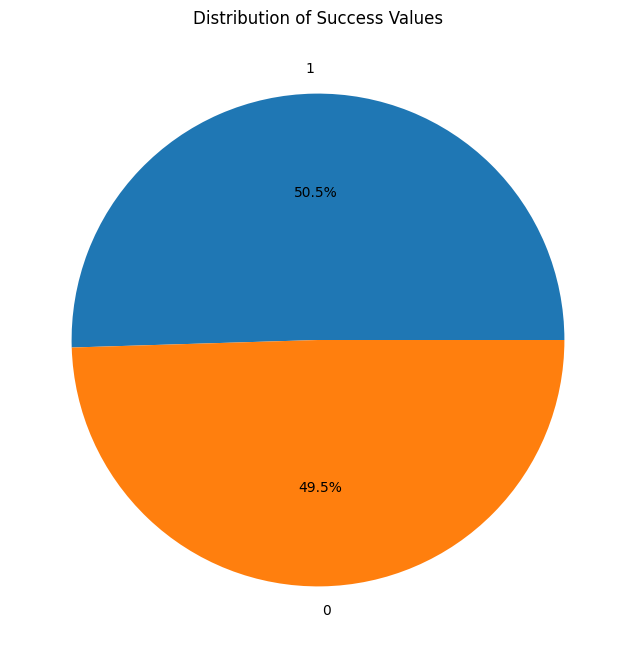

In [ ]:
# melihat distribusi data profit
success_counts = df1['success'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(success_counts, labels=success_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Success Values')
plt.show()

In [ ]:
# data setelah dilakukan feature engineering
df1.head()

,names,released_year,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,released_month,profit,success
0,Creed III,2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,english,75.0,271.616668,US,2,196.616668,1
1,Avatar: The Way of Water,2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,english,460.0,2316.794914,US,12,1856.794914,1
2,The Super Mario Bros. Movie,2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,english,100.0,724.459031,US,5,624.459031,1
3,Mummies,2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"spanish, castilian",12.3,34.200000,ES,5,21.900000,0
4,Supercell,2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,english,77.0,340.941959,US,3,263.941959,1


## EDA

In [ ]:
#split data berdasarkan numerik dan categorical
num = df.select_dtypes(include=['int64', 'float64'])
cat = df.select_dtypes(include=['object'])

In [ ]:
# menghitung VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant
a = add_constant(num)

vif_df = pd.DataFrame([vif(a.values, i)
               for i in range(a.shape[1])],
              index=a.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

,feature,vif_score
1,released_year,1.060649
2,score,1.023375
3,budget,2.303613
4,revenue,2.272558
5,released_month,1.001418


<Axes: >

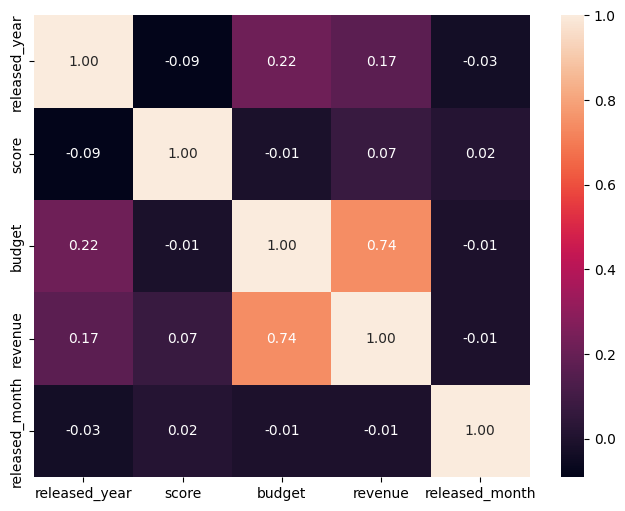

In [ ]:
# correlation heatmap
plt.figure(figsize=(8,6))
correlation = num.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

ada hubungan yang kuat antara `budget` dengan `revenue`

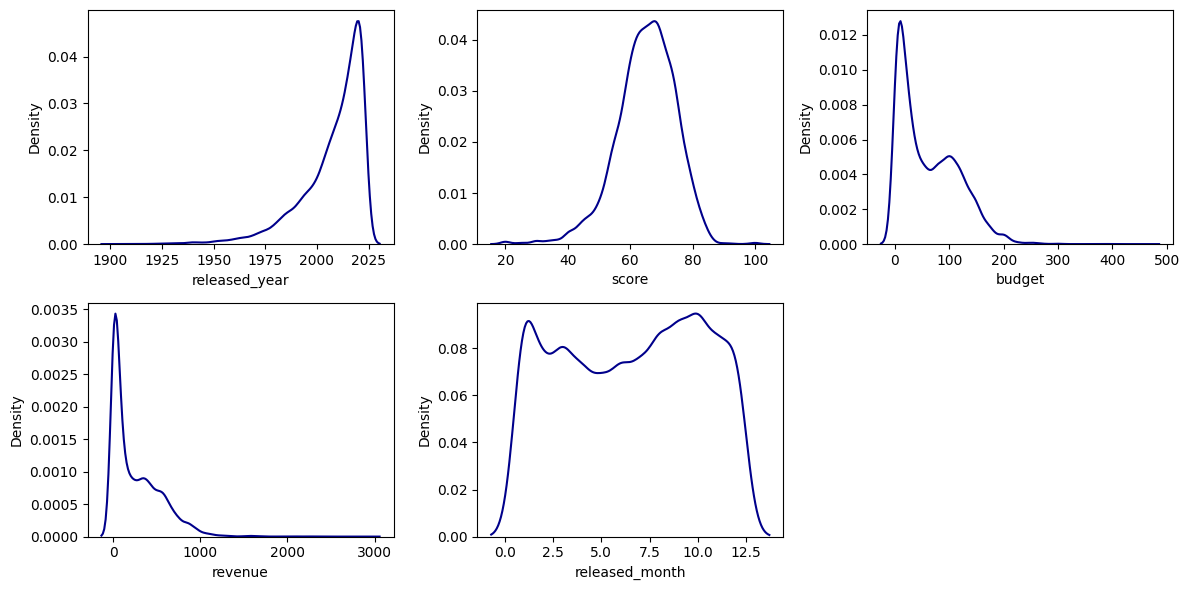

In [ ]:
plt.figure(figsize=(12,6))

data = num.columns.tolist()
for i in range(len(data)):
    plt.subplot(2, (len(data)+1)//2, i+1)
    sns.kdeplot(x=num[data[i]], color='Darkblue')
    plt.xlabel(data[i])
    plt.tight_layout()

film direleased paling banyak ditahun 2000 s/d 2020an<br>
score paling banyak diantara 50 s/d 80<br>
budget paling banyak diantara USD 1jt s/d USD 50jt<br>
revenue paling banyak diantara USD 1jt s/d USD 200jt<br>
film direleased paling sedikit dibulan 4 s/d 5

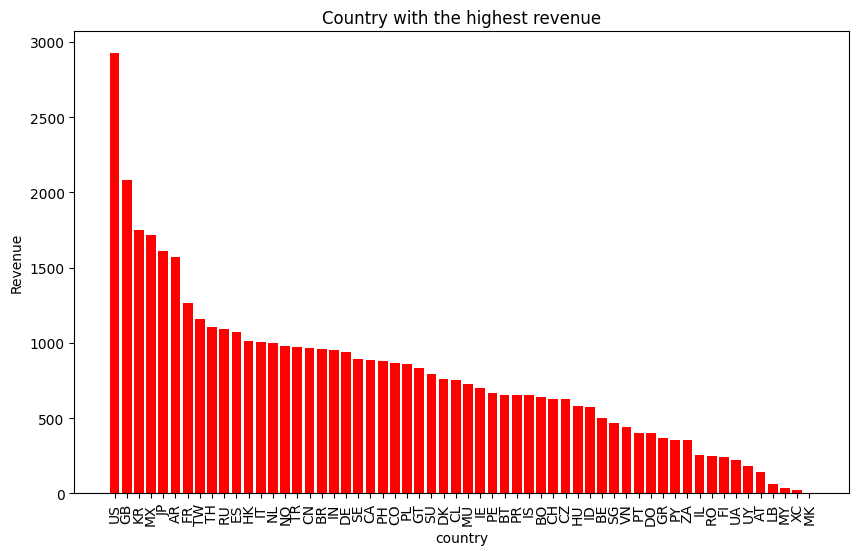

In [ ]:
Revenue_Country = df.sort_values('revenue', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(Revenue_Country['country'], Revenue_Country['revenue'], color='red')
plt.title('Country with the highest revenue')
plt.xlabel('country')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()


film dengan pendapatan terbesar :<br>
1. USA
2. Great Britain
3. South Korea

In [ ]:
# Mengubah string genre menjadi list
df1['genre'] = df1['genre'].str.split(r',\s*')

# Mengubah setiap elemen list ke dalam barisnya sendiri
genres_expanded = df1.explode('genre')
average_meta_score_per_genre = genres_expanded.groupby('genre')['revenue'].mean().reset_index()

average_IMDB_Rating_per_genre_sorted = average_meta_score_per_genre.sort_values(by='revenue', ascending=False)
average_IMDB_Rating_per_genre_sorted

,genre,revenue
5,Documentary,536.459368
15,TV Movie,495.004445
2,Animation,377.143561
7,Family,320.355711
8,Fantasy,306.237268
1,Adventure,297.880651
11,Music,284.286700
14,Science Fiction,280.511563
13,Romance,260.539844
0,Action,255.590631


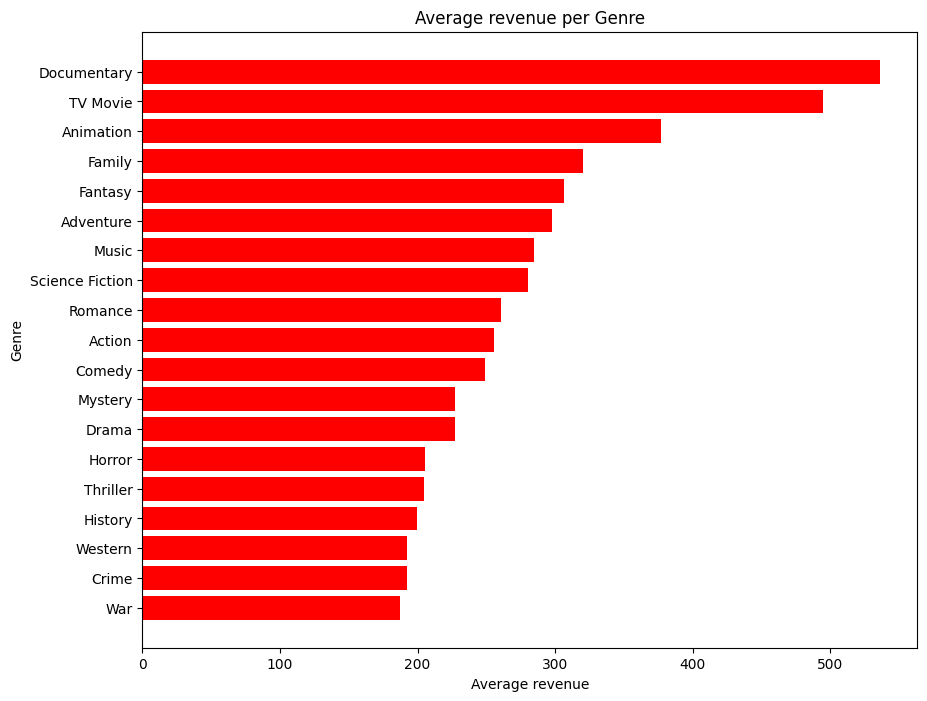

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(average_IMDB_Rating_per_genre_sorted)))

plt.figure(figsize=(10, 8))
plt.barh(average_IMDB_Rating_per_genre_sorted['genre'], average_IMDB_Rating_per_genre_sorted['revenue'], color='red')  # Membuat bar chart horizontal
plt.xlabel('Average revenue')
plt.ylabel('Genre')
plt.title('Average revenue per Genre')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
average_profit_per_genre = genres_expanded.groupby('genre')['profit'].mean().reset_index()

average_profit_per_genre_sorted = average_profit_per_genre.sort_values(by='profit', ascending=False)
average_profit_per_genre_sorted

,genre,profit
5,Documentary,448.490218
15,TV Movie,391.148382
2,Animation,290.749426
7,Family,241.379132
8,Fantasy,229.470759
11,Music,224.182143
1,Adventure,218.997412
14,Science Fiction,207.656171
13,Romance,201.971664
3,Comedy,188.291655


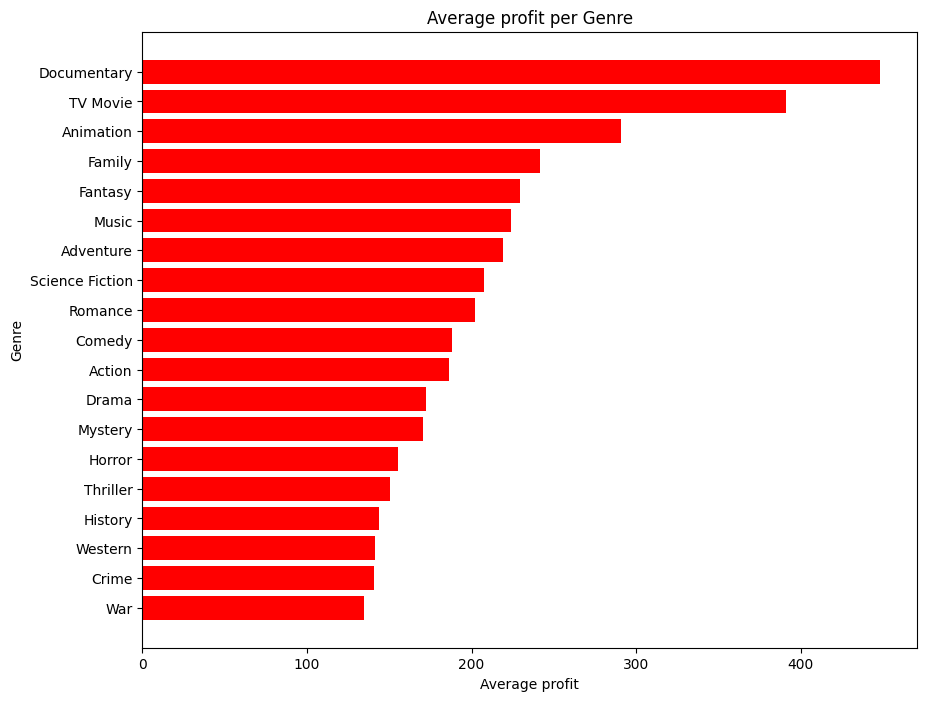

In [ ]:
colors = plt.cm.viridis(np.linspace(0, 1, len(average_IMDB_Rating_per_genre_sorted)))

plt.figure(figsize=(10, 8))
plt.barh(average_profit_per_genre_sorted['genre'], average_profit_per_genre_sorted['profit'], color='red')  # Membuat bar chart horizontal
plt.xlabel('Average profit')
plt.ylabel('Genre')
plt.title('Average profit per Genre')
plt.gca().invert_yaxis()
plt.show()

Genre film yang paling besar pendapatan maupun profitnya:
1. Documentary
2. TV Movie
3. Animation

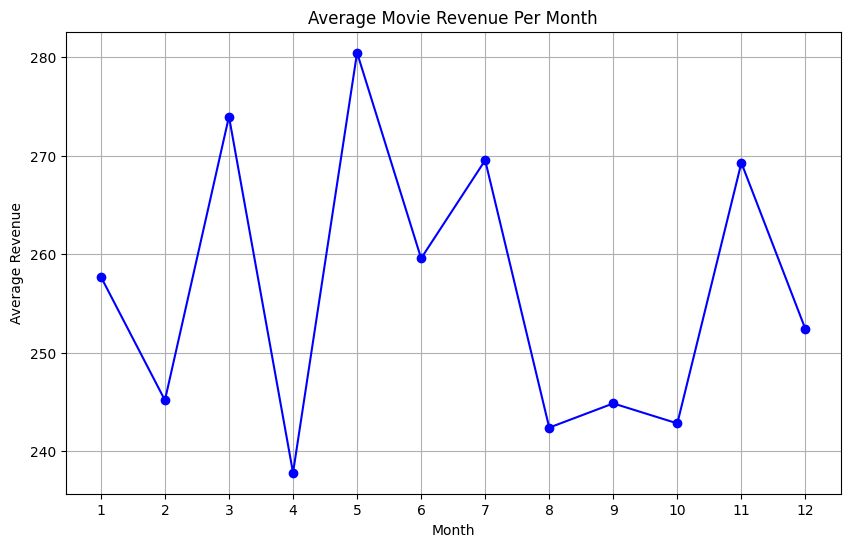

In [ ]:
average_revenue_per_month = df.groupby('released_month')['revenue'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_revenue_per_month.index, average_revenue_per_month.values, marker='o', linestyle='-', color='b')
plt.title('Average Movie Revenue Per Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue')
plt.xticks(range(1, 13))
plt.grid(True)

plt.show()

Film dengan pendapatan tertinggi direlease pada bulan:
1. Mei
2. Maret
3. Juli
4. November

## Mechine Learning Model (Classification)

In [ ]:
df1.head()

,names,released_year,score,genre,overview,crew,orig_title,status,orig_lang,budget,revenue,country,released_month,profit,success
0,Creed III,2023,73.0,"[Drama, Action]","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,english,75.0,271.616668,US,2,196.616668,1
1,Avatar: The Way of Water,2022,78.0,"[Science Fiction, Adventure, Action]",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,english,460.0,2316.794914,US,12,1856.794914,1
2,The Super Mario Bros. Movie,2023,76.0,"[Animation, Adventure, Family, Fantasy, Comedy]","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,english,100.0,724.459031,US,5,624.459031,1
3,Mummies,2023,70.0,"[Animation, Comedy, Family, Adventure, Fantasy]","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"spanish, castilian",12.3,34.200000,ES,5,21.900000,0
4,Supercell,2023,61.0,[Action],Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,english,77.0,340.941959,US,3,263.941959,1


untuk mengklasifikasikan kesuksesan sebuah film, saya hanya menggunakan fitur `released_year`,	`score`,	`genre`,	`orig_lang`,	`budget`,	`country`,	`released_month`
fitur lain saya drop karena tidak memiliki kontribusi signifikan, sedangkan `revenue` dan `profit` saya drop, karena saya ingin memprediksi kesuksesan sebuah film, sebelum film tersebut direlease ke public

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score

#drop kolom yang tidak di gunakan dalam analisis
df1 = df1.drop(columns=['names', 'overview', 'crew', 'orig_title', 'status', 'revenue', 'profit'])

df1.head()

,released_year,score,genre,orig_lang,budget,country,released_month,success
0,2023,73.0,"[Drama, Action]",english,75.0,US,2,1
1,2022,78.0,"[Science Fiction, Adventure, Action]",english,460.0,US,12,1
2,2023,76.0,"[Animation, Adventure, Family, Fantasy, Comedy]",english,100.0,US,5,1
3,2023,70.0,"[Animation, Comedy, Family, Adventure, Fantasy]","spanish, castilian",12.3,ES,5,0
4,2023,61.0,[Action],english,77.0,US,3,1


In [ ]:
# Mengubah kolom kategorikal menjadi numerik
label_encoder = LabelEncoder()
for column in ['orig_lang', 'country']:
    df1[column] = label_encoder.fit_transform(df1[column])

# Memecah genre menjadi kolom tersendiri disetiap genrenya
df1 = df1.explode('genre')
df1.head()

,released_year,score,genre,orig_lang,budget,country,released_month,success
0,2023,73.0,Drama,11,75.0,53,2,1
0,2023,73.0,Action,11,75.0,53,2,1
1,2022,78.0,Science Fiction,11,460.0,53,12,1
1,2022,78.0,Adventure,11,460.0,53,12,1
1,2022,78.0,Action,11,460.0,53,12,1


In [ ]:
# Membuat kolom tersendiri disetiap genre
df1 = pd.get_dummies(df1, columns=['genre'], drop_first=True)
df1.head()

,released_year,score,orig_lang,budget,country,released_month,success,genre_Adventure,genre_Animation,genre_Comedy,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,2023,73.0,11,75.0,53,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,2023,73.0,11,75.0,53,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,78.0,11,460.0,53,12,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2022,78.0,11,460.0,53,12,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,78.0,11,460.0,53,12,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Menyatukan baris yang terpecah menjadi 1 baris

# Membuat daftar kolom untuk dikelompokkan yang tidak mengandung kata "Genre"
group_columns = [col for col in df1.columns if 'genre_' not in col]

# Membuat dictionary untuk agregasi dengan kolom 'Genre_*' menggunakan 'max'
agg_dict = {col: 'max' for col in df1.columns if 'genre_' in col}

# Melakukan groupby dan agregasi
df1 = df1.groupby(group_columns, as_index=False).agg(agg_dict)

df1.head()

,released_year,score,orig_lang,budget,country,released_month,success,genre_Adventure,genre_Animation,genre_Comedy,...,genre_History,genre_Horror,genre_Music,genre_Mystery,genre_Romance,genre_Science Fiction,genre_TV Movie,genre_Thriller,genre_War,genre_Western
0,1903,63.0,13,106.400000,17,5,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1907,80.0,13,0.005985,17,6,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1915,61.0,11,0.110000,53,8,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1915,61.0,11,10.000000,53,8,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1920,80.0,15,0.018000,12,2,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
X1 = df1.drop('success', axis=1)
y1 = df1['success']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
grid_search.fit(X1_train, y1_train)
print("Best Parameters:", grid_search.best_params_)

# Menggunakan model terbaik yang ditemukan oleh GridSearchCV
best_model = grid_search.best_estimator_

# Evaluasi Model
y1_pred = best_model.predict(X1_test)
print(classification_report(y1_test, y1_pred))

y1_prob = best_model.predict_proba(X1_test)[:, 1]
roc_auc = roc_auc_score(y1_test, y1_prob)
print("AUC-ROC Score:", roc_auc)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters: {'max_depth': 5, 'n_estimators': 30}
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       969
           1       0.86      0.81      0.83       976

    accuracy                           0.84      1945
   macro avg       0.84      0.84      0.84      1945
weighted avg       0.84      0.84      0.84      1945

AUC-ROC Score: 0.8880748913025089


Precision: Rasio prediksi positif yang benar terhadap total prediksi positif.

Recall: Rasio prediksi positif yang benar terhadap total positif sebenarnya..

F1-Score: Rata-rata dari precision dan recall. Model ini memiliki F1-score 0.84 & 0.83, menunjukkan keseimbangan yang baik antara precision dan recall.

Accuracy: Persentase prediksi yang benar dari semua prediksi. Model ini memiliki akurasi 0.84 (84%), menunjukkan bahwa sekitar 84% dari prediksi yang dibuat oleh model adalah benar.

AUC-ROC score: score sebesar 0.8881 (88,81%), ini menunjukkan bahwa model cukup efektif dalam membedakan antara kedua kelas dan memiliki tingkat keakuratan yang tinggi dalam prediksi.

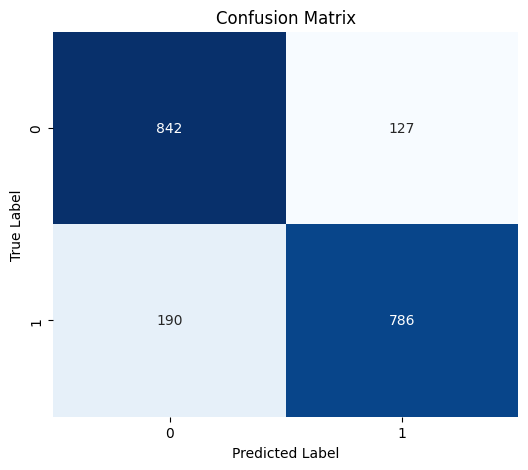

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y1_test, y1_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5])
plt.yticks(ticks=[0.5, 1.5], va='center')
plt.show()

True Negatives (TN): 842 jumlah kasus yang model prediksi sebagai negatif dan memang benar negatif.<br>
False Positives (FP): 127 jumlah kasus yang model prediksi sebagai positif tapi sebenarnya negatif.<br>
False Negatives (FN): 190 jumlah kasus yang model prediksi sebagai negatif tapi sebenarnya positif.<br>
True Positives (TP): 789 jumlah kasus yang model prediksi sebagai positif dan memang benar positif.

## CONCLUSION

Dataset IMDB yang digunakan dalam penelitian ini terdiri dari 10.178 entri dan 12 variabel. Untuk melakukan analisis, saya membuat kolom 'Profit' yang merupakan selisih antara 'revenue' dan 'budget'. Nilai 'budget' dan 'revenue' disederhanakan kedalam nilai jutaan untuk agar mudah dipahami. Dataset ini mengandung 1,24% missing values, yang kemudian dieliminasi untuk menjaga kualitas analisis. Data dibagi menjadi dua subset: 80% sebagai data pelatihan dan 20% sebagai data pengujian.

Dalam melakukan klasifikasi dengan mechine learning, saya menggunakan teknik label encoder dan one-hot encoding untuk mengkonversi fitur non-numerik menjadi format numerik. Untuk melakukan prediksi saya menggunakan Model Random Forest Classifier, hasilnya adalah F1 Score sebesar 0.84 dan 0.83. Hal ini menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan sensitivitas. Selain itu, model menunjukkan akurasi sebesar 0.84 (84%), yang menandakan bahwa sekitar 84% prediksi yang dibuat oleh model adalah akurat. AUC-ROC score 0.8881 (88,81%), ini menunjukkan bahwa model cukup efektif dalam membedakan antara kedua kelas dan memiliki tingkat keakuratan yang tinggi dalam prediksi.

## RECOMMENDATION

Berdasarkan hasil penelitian, kami merekomendasikan beberapa strategi untuk produser dalam meningkatkan potensi pendapatan dari produksi film:

1. **Alokasi Anggaran yang Strategis**: Disarankan agar produser mengalokasikan anggaran produksi secara strategis. Analisis menunjukkan bahwa terdapat korelasi positif antara besarnya anggaran dengan pendapatan yang dihasilkan. Investasi yang lebih besar dalam produksi cenderung menghasilkan pendapatan yang lebih tinggi.

2. **Pemilihan Genre yang Tepat**: Fokus pada genre film seperti dokumenter, Movie TV, dan animasi yang terbukti memiliki potensi pendapatan yang lebih tinggi. Penelitian menunjukkan bahwa genre-genre tersebut menarik minat penonton secara signifikan, yang berpotensi meningkatkan pendapatan.

3. **Penargetan Pasar yang Efektif**: Penting bagi produser untuk menargetkan pasar yang tepat. Negara-negara seperti Amerika Serikat, Britania Raya, dan Korea Selatan teridentifikasi memiliki potensi pendapatan yang signifikan. Membuat film yang bertemakan negara-negara tersebut dapat secara substansial meningkatkan pendapatan.

4. **Penjadwalan Rilis yang Optimal**: Memilih waktu rilis yang tepat juga dapat mempengaruhi pendapatan. Bulan Mei, Maret, dan November tercatat memiliki rata-rata pendapatan tertinggi. Menjadwalkan rilis film pada bulan-bulan tersebut dapat memberikan keuntungan tambahan.

Rekomendasi ini diharapkan dapat membantu produser dalam merencanakan dan mengimplementasikan strategi produksi yang lebih efektif untuk meningkatkan pendapatan film.

## APPENDIX

Dataset:<br>
https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset